In [1]:
#SOURCES:

#The dataset was downloaded from https://www.kaggle.com/datasets/sanjivpradhanang/ufc-fight-stats,
#The csv dataset was created by SANJIV PRADHANANG 
# All stats orginate from http://ufcstats.com

In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("ufc_fight_stats.csv")

In [3]:
df.head()

,fighter_1,fighter_2,knockdowns_1,knockdowns_2,total_strikes_1,total_strikes_2,significant_strikes_1,significant_strikes_2,head_strikes_1,head_strikes_2,...,reversals_1,reversals_2,control_time_1,control_time_2,result,method,round,time,referee,ufc_stats_com_url
0,Alexa Grasso,Valentina Shevchenko,1,0,262 of 408,199 of 301,84 of 203,80 of 179,54 of 151,61 of 158,...,1,0,2:39,8:37,D,Decision - Split,5,5:00,Herb Dean,http://ufcstats.com/fight-details/b395c89e19a3...
1,Kevin Holland,Jack Della Maddalena,0,0,127 of 356,105 of 190,127 of 356,105 of 190,59 of 258,46 of 115,...,0,0,0:00,0:00,L,Decision - Split,3,5:00,Jason Herzog,http://ufcstats.com/fight-details/697efaf0d162...
2,Raul Rosas Jr.,Terrence Mitchell,1,0,19 of 31,6 of 19,18 of 30,6 of 19,17 of 29,5 of 18,...,0,0,0:17,0:00,W,KO/TKO,1,0:54,Mark Smith,http://ufcstats.com/fight-details/c0ca4c201d08...
3,Daniel Zellhuber,Christos Giagos,0,0,36 of 101,38 of 82,36 of 101,38 of 82,18 of 75,25 of 63,...,0,0,0:17,0:11,W,Submission,2,3:26,Jason Herzog,http://ufcstats.com/fight-details/2e1435c160bf...
4,Fernando Padilla,Kyle Nelson,0,0,73 of 209,83 of 185,72 of 208,82 of 184,42 of 168,43 of 143,...,0,0,0:07,0:00,L,Decision - Unanimous,3,5:00,Chris Tognoni,http://ufcstats.com/fight-details/a5d76e93a505...


In [4]:
df.shape

(3561, 34)

In [5]:
for col in df.columns:
    print(col)
    
# Here are the titles of the 34 columns of this dataset. 

# Some non-numerical values can be discarded like : 'fighter_1'(name), 'fighter_2'(name), 'referee'(name) and
#'ufc_stats_com_url'(link from which data was extracted). Since they are not performance variables.

# On the other hand, some non-numerical values are very important like: 'result'(fight result: Win, loss, etc.) and 
#'method'(The method by which the result was obtained: Was the fight result a KO/TKO (automatic win)? 
# Was the fight result decided by the judges (non-KO/TKO result)? And was that judge's decision unanimous or split?

# The numerical variables are easier to analyze. They are represented by simple numbers(EX:'knockdowns_1'), 
# a proportion (EX: 'total_strikes_1') that describes the number of strikes landed / total number of strikes attempted, 
# (EX: when total strikes are shown as 262 of 408 (first row), it means 262 strikes landed of 408 attempted) or,
# time (EX: 'time' that describes the time count of the last round of the fight).


fighter_1
fighter_2
knockdowns_1
knockdowns_2
total_strikes_1
total_strikes_2
significant_strikes_1
significant_strikes_2
head_strikes_1
head_strikes_2
body_strikes_1
body_strikes_2
leg_strikes_1
leg_strikes_2
distance_strikes_1
distance_strikes_2
clinch_strikes_1
clinch_strikes_2
ground_strikes_1
ground_strikes_2
takedowns_1
takedowns_2
submission_attempts_1
submission_attempts_2
reversals_1
reversals_2
control_time_1
control_time_2
result
method
round
time
referee
ufc_stats_com_url


In [6]:
del df['fighter_1']
del df['fighter_2']
del df['referee']
del df['ufc_stats_com_url']
df.head()

,knockdowns_1,knockdowns_2,total_strikes_1,total_strikes_2,significant_strikes_1,significant_strikes_2,head_strikes_1,head_strikes_2,body_strikes_1,body_strikes_2,...,submission_attempts_1,submission_attempts_2,reversals_1,reversals_2,control_time_1,control_time_2,result,method,round,time
0,1,0,262 of 408,199 of 301,84 of 203,80 of 179,54 of 151,61 of 158,12 of 22,6 of 8,...,1,1,1,0,2:39,8:37,D,Decision - Split,5,5:00
1,0,0,127 of 356,105 of 190,127 of 356,105 of 190,59 of 258,46 of 115,33 of 55,36 of 49,...,0,0,0,0,0:00,0:00,L,Decision - Split,3,5:00
2,1,0,19 of 31,6 of 19,18 of 30,6 of 19,17 of 29,5 of 18,1 of 1,1 of 1,...,0,0,0,0,0:17,0:00,W,KO/TKO,1,0:54
3,0,0,36 of 101,38 of 82,36 of 101,38 of 82,18 of 75,25 of 63,11 of 19,3 of 7,...,1,0,0,0,0:17,0:11,W,Submission,2,3:26
4,0,0,73 of 209,83 of 185,72 of 208,82 of 184,42 of 168,43 of 143,17 of 22,19 of 20,...,0,0,0,0,0:07,0:00,L,Decision - Unanimous,3,5:00


In [7]:
#HYPOTHESIS:

# The main focus of this analysis is to find if there is any correlation between fighting styles and win rate.


# The target variable is the fight result ('result'). 


# I think that the principal components to predict the fight outcome are :

#    - (Landed)'Significant strikes' amount because although all strikes are important, significant strikes are
# the ones where the fighter commits to it and inflicts the most damage when landed. The other type of strikes
# are sometimes thrown to set up another strike or to make the opponent flinch and distract him.

#    - Accuracy percentage of significant strikes (can be calculated by dividing the # of significant strikes landed by #
# of significant strikes attempted). Accuracy plays a major role in the energy conservation of the fighter. If the fighter 
# spends too much energy on strikes and doesn't land them, he will get tired and be at a disadvantage. Also, it's useful to 
# calculate the accuracy of significant strikes but not so much for the other strikes since, like I mentioned before, some
# strikes are only thrown to make the opponent react a certain way to set up something else. In other words, fighters purposely 
# miss some strikes the difference is, with significant strikes when you miss them, you lose a lot of energy which will make a 
# difference in the fight.
 
#    -  Control time. Control time is described by UFC Stats officials as the time a certain fighter has spent in a dominant
# position over his opponent. This is crucial in the outcome of a fight since in a dominant position, a fight will usually spend
# less energy than his opponent and have more opportunities to land strikes.

In [8]:
# Replace fight result values by numerical values so it's easier to analyse (EX : correlation)
# The fight reuslt describes the result relatif to fighter 1 ('W' is win for fighter #1, 'L' is win for fighter #2)

df['result'].replace({'W': 1, 'L': 0, 'D': 2, 'NC': 3}, inplace=True) 
df.head()

,knockdowns_1,knockdowns_2,total_strikes_1,total_strikes_2,significant_strikes_1,significant_strikes_2,head_strikes_1,head_strikes_2,body_strikes_1,body_strikes_2,...,submission_attempts_1,submission_attempts_2,reversals_1,reversals_2,control_time_1,control_time_2,result,method,round,time
0,1,0,262 of 408,199 of 301,84 of 203,80 of 179,54 of 151,61 of 158,12 of 22,6 of 8,...,1,1,1,0,2:39,8:37,2,Decision - Split,5,5:00
1,0,0,127 of 356,105 of 190,127 of 356,105 of 190,59 of 258,46 of 115,33 of 55,36 of 49,...,0,0,0,0,0:00,0:00,0,Decision - Split,3,5:00
2,1,0,19 of 31,6 of 19,18 of 30,6 of 19,17 of 29,5 of 18,1 of 1,1 of 1,...,0,0,0,0,0:17,0:00,1,KO/TKO,1,0:54
3,0,0,36 of 101,38 of 82,36 of 101,38 of 82,18 of 75,25 of 63,11 of 19,3 of 7,...,1,0,0,0,0:17,0:11,1,Submission,2,3:26
4,0,0,73 of 209,83 of 185,72 of 208,82 of 184,42 of 168,43 of 143,17 of 22,19 of 20,...,0,0,0,0,0:07,0:00,0,Decision - Unanimous,3,5:00


In [9]:
# 'No contest' result is obtained when a fighter lands an illegal blow that causes his opponent to be injured and unable to 
# continue fighting (EX: eye poke). In a no-contest fight, there is no winner. This means that fights that end with a no 
# contest are useless to this study since we cannot calculate winrate.

# Draws are also useless for this study because there's no winner in a draw therefore, cannot calculate winrate.

# Removing no contest fights from the data frame: 


df = df.loc[df['result'] < 2]


if '2' in df['result'] :
    print('''Value "2" is still in the column "result"''')
else :
    print('''Value "2" is not found in the column "result"''')
    
if '3' in df['result'] :
    print('''Value "3" is still in the column "result"''')
else :
    print('''Value "3" is not found in the column "result"''')

Value "2" is not found in the column "result"
Value "3" is not found in the column "result"


In [10]:
# Verifying that dataframe was updated.
df.shape

(3491, 30)

In [11]:
# Separting strike and takedowns columns value into 2 columns each:

# Columns that count strikes and takedowns are described as a proportion (EX: in the first row, 'total_strikes_1' are 
# described as 262 of 408). It represents the strikes that landed vs the total strikes thrown or attempted by a fighter.
# For this reason, it's important to separate those data into 2 columns to be able to analyze them since right now, they're 
# strings and not floats or integers.


    # Creating a list of the names of all columns:
    
df_StrikeList = []

for col in df.columns:
    df_StrikeList.append(f'{col}')
    
print(df_StrikeList)

['knockdowns_1', 'knockdowns_2', 'total_strikes_1', 'total_strikes_2', 'significant_strikes_1', 'significant_strikes_2', 'head_strikes_1', 'head_strikes_2', 'body_strikes_1', 'body_strikes_2', 'leg_strikes_1', 'leg_strikes_2', 'distance_strikes_1', 'distance_strikes_2', 'clinch_strikes_1', 'clinch_strikes_2', 'ground_strikes_1', 'ground_strikes_2', 'takedowns_1', 'takedowns_2', 'submission_attempts_1', 'submission_attempts_2', 'reversals_1', 'reversals_2', 'control_time_1', 'control_time_2', 'result', 'method', 'round', 'time']


In [12]:
    # Printing the names of columns that describe strikes and takedowns:
    
    for ColName in df_StrikeList[2:20]:
        print(ColName)

total_strikes_1
total_strikes_2
significant_strikes_1
significant_strikes_2
head_strikes_1
head_strikes_2
body_strikes_1
body_strikes_2
leg_strikes_1
leg_strikes_2
distance_strikes_1
distance_strikes_2
clinch_strikes_1
clinch_strikes_2
ground_strikes_1
ground_strikes_2
takedowns_1
takedowns_2


In [13]:
    # Separating columns that describe strikes and takedowns and creating new columns to input the separted values:

    for ColName in df_StrikeList[2:20]:
        df[[f'{ColName} (landed)', f'{ColName} (attempted)']] = df[f'{ColName}'].str.split('of', expand=True)
        
    df.head()

,knockdowns_1,knockdowns_2,total_strikes_1,total_strikes_2,significant_strikes_1,significant_strikes_2,head_strikes_1,head_strikes_2,body_strikes_1,body_strikes_2,...,clinch_strikes_2 (landed),clinch_strikes_2 (attempted),ground_strikes_1 (landed),ground_strikes_1 (attempted),ground_strikes_2 (landed),ground_strikes_2 (attempted),takedowns_1 (landed),takedowns_1 (attempted),takedowns_2 (landed),takedowns_2 (attempted)
1,0,0,127 of 356,105 of 190,127 of 356,105 of 190,59 of 258,46 of 115,33 of 55,36 of 49,...,11,15,0,0,0,0,0,2,0,0
2,1,0,19 of 31,6 of 19,18 of 30,6 of 19,17 of 29,5 of 18,1 of 1,1 of 1,...,0,0,11,17,0,0,0,0,0,0
3,0,0,36 of 101,38 of 82,36 of 101,38 of 82,18 of 75,25 of 63,11 of 19,3 of 7,...,2,3,0,0,0,0,0,0,0,6
4,0,0,73 of 209,83 of 185,72 of 208,82 of 184,42 of 168,43 of 143,17 of 22,19 of 20,...,2,8,0,0,0,0,0,1,0,3
5,1,0,37 of 51,34 of 48,21 of 31,3 of 13,15 of 25,0 of 6,4 of 4,2 of 3,...,0,0,3,4,0,1,5,5,0,1


In [14]:
    # Deleting columns that describe strikes and takedowns before separation:
    
    for ColName in df_StrikeList[2:20]:
        del df[ColName]
        
    df.head()

,knockdowns_1,knockdowns_2,submission_attempts_1,submission_attempts_2,reversals_1,reversals_2,control_time_1,control_time_2,result,method,...,clinch_strikes_2 (landed),clinch_strikes_2 (attempted),ground_strikes_1 (landed),ground_strikes_1 (attempted),ground_strikes_2 (landed),ground_strikes_2 (attempted),takedowns_1 (landed),takedowns_1 (attempted),takedowns_2 (landed),takedowns_2 (attempted)
1,0,0,0,0,0,0,0:00,0:00,0,Decision - Split,...,11,15,0,0,0,0,0,2,0,0
2,1,0,0,0,0,0,0:17,0:00,1,KO/TKO,...,0,0,11,17,0,0,0,0,0,0
3,0,0,1,0,0,0,0:17,0:11,1,Submission,...,2,3,0,0,0,0,0,0,0,6
4,0,0,0,0,0,0,0:07,0:00,0,Decision - Unanimous,...,2,8,0,0,0,0,0,1,0,3
5,1,0,6,0,0,0,6:29,0:22,1,Submission,...,0,0,3,4,0,1,5,5,0,1


In [15]:
# The method describes how the fight result was obtained ( Was the fight result a KO/TKO? A submission? (automatic win)
# Or, was the fight result decided by the judges (non-KO/TKO result)? And was that decision unanimous or split?

# This column gives more details on the fight result but do not affect the winrate. Since the focus of this analysis
# is winrate, method values can be discarded.
# In the futur, it could be intresting to see the correltation between the method by which a fight was won/loss and 
# the other component of this dataframe.

del df['method'] 

In [16]:
# Converting 'time', 'control_time_1' and 'control_time_2' values from minutes (xx:xx) to secondes for an easier anlaysis.

import datetime
import time

df['time'] = pd.to_timedelta('00:'+df['time'])
df['time'] = pd.to_timedelta(df['time']).dt.total_seconds() 

df['control_time_1'] = pd.to_timedelta('00:'+df['control_time_1'])
df['control_time_1'] = pd.to_timedelta(df['control_time_1']).dt.total_seconds() 

df['control_time_2'] = pd.to_timedelta('00:'+df['control_time_2'])
df['control_time_2'] = pd.to_timedelta(df['control_time_2']).dt.total_seconds() 

print(df['time'])
print(df['control_time_1'])
print(df['control_time_2'])

1       300.0
2        54.0
3       206.0
4       300.0
5       218.0
        ...  
3555     40.0
3556    300.0
3557     14.0
3558    109.0
3560    147.0
Name: time, Length: 3491, dtype: float64
1         0.0
2        17.0
3        17.0
4         7.0
5       389.0
        ...  
3555     55.0
3556     30.0
3557      2.0
3558     65.0
3560      3.0
Name: control_time_1, Length: 3491, dtype: float64
1        0.0
2        0.0
3       11.0
4        0.0
5       22.0
        ... 
3555    25.0
3556    36.0
3557     0.0
3558     7.0
3560    51.0
Name: control_time_2, Length: 3491, dtype: float64


In [17]:
# Printing a sorted correlation matrix between the 'result' target variable and all the others.

corr_matrix = df.corr()['result']
corr_matrix.sort_values()

knockdowns_2                        -0.352472
ground_strikes_2 (landed)           -0.342268
ground_strikes_2 (attempted)        -0.339883
control_time_2                      -0.280706
head_strikes_2 (landed)             -0.260412
total_strikes_2 (landed)            -0.248028
significant_strikes_2 (landed)      -0.222608
takedowns_2 (landed)                -0.206610
submission_attempts_2               -0.185432
total_strikes_2 (attempted)         -0.155597
clinch_strikes_2 (landed)           -0.131271
distance_strikes_2 (landed)         -0.125655
clinch_strikes_2 (attempted)        -0.121357
head_strikes_2 (attempted)          -0.121205
significant_strikes_2 (attempted)   -0.113865
body_strikes_2 (landed)             -0.097291
takedowns_2 (attempted)             -0.090899
body_strikes_2 (attempted)          -0.059807
leg_strikes_2 (landed)              -0.054258
distance_strikes_2 (attempted)      -0.049823
leg_strikes_2 (attempted)           -0.032466
reversals_2                       

# accurcy coorelation : divide landed by attempted and create new column call accurcy  For each strike column  - ur hypothsis is only for sign. strikes


<Axes: >

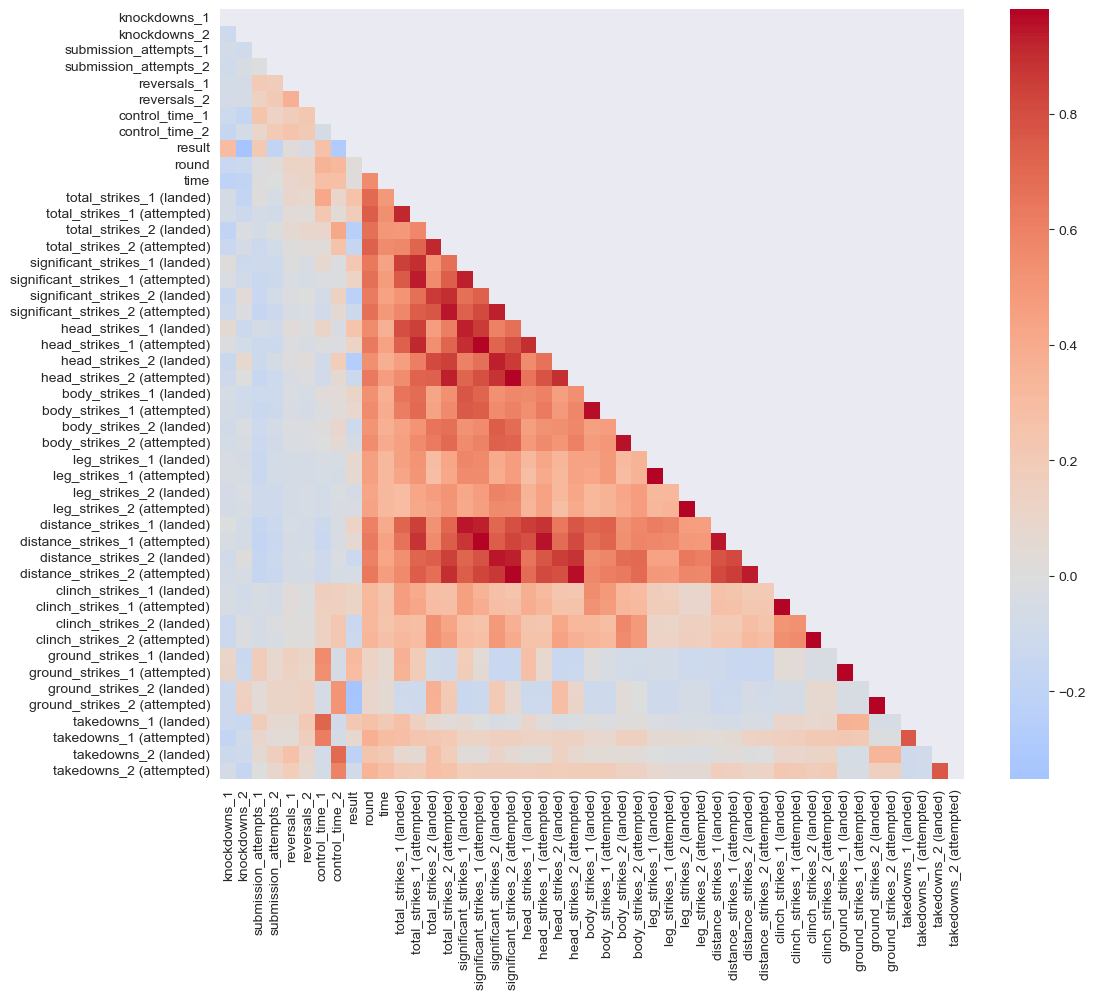

In [18]:
# Here's a heat map of the correlation that is shared between each column. This will help to have an overview of how variables
# interact with each other which could lead to new study paths.

import seaborn as sns
from matplotlib import pyplot as plt

sns.set_style('dark', {'axes.grid' : False})
plt.figure(figsize=(12, 10))
sns.heatmap(data=df.corr(), cmap='coolwarm', center=0, mask=np.triu(df.corr()))

In [19]:
# Creating a seconde dataframe to display accuracy:

df2 = df.copy(deep=True)
df2.head()

,knockdowns_1,knockdowns_2,submission_attempts_1,submission_attempts_2,reversals_1,reversals_2,control_time_1,control_time_2,result,round,...,clinch_strikes_2 (landed),clinch_strikes_2 (attempted),ground_strikes_1 (landed),ground_strikes_1 (attempted),ground_strikes_2 (landed),ground_strikes_2 (attempted),takedowns_1 (landed),takedowns_1 (attempted),takedowns_2 (landed),takedowns_2 (attempted)
1,0,0,0,0,0,0,0.0,0.0,0,3,...,11,15,0,0,0,0,0,2,0,0
2,1,0,0,0,0,0,17.0,0.0,1,1,...,0,0,11,17,0,0,0,0,0,0
3,0,0,1,0,0,0,17.0,11.0,1,2,...,2,3,0,0,0,0,0,0,0,6
4,0,0,0,0,0,0,7.0,0.0,0,3,...,2,8,0,0,0,0,0,1,0,3
5,1,0,6,0,0,0,389.0,22.0,1,2,...,0,0,3,4,0,1,5,5,0,1


In [20]:
    # Deleting unwanted columns where accurcy cannot be calculated
    
    del df2['knockdowns_1']
    del df2['knockdowns_2']
    del df2['submission_attempts_1']
    del df2['submission_attempts_2']
    del df2['reversals_1']
    del df2['reversals_2']
    del df2['control_time_1']
    del df2['control_time_2']

    df2.head()

,result,round,time,total_strikes_1 (landed),total_strikes_1 (attempted),total_strikes_2 (landed),total_strikes_2 (attempted),significant_strikes_1 (landed),significant_strikes_1 (attempted),significant_strikes_2 (landed),...,clinch_strikes_2 (landed),clinch_strikes_2 (attempted),ground_strikes_1 (landed),ground_strikes_1 (attempted),ground_strikes_2 (landed),ground_strikes_2 (attempted),takedowns_1 (landed),takedowns_1 (attempted),takedowns_2 (landed),takedowns_2 (attempted)
1,0,3,300.0,127,356,105,190,127,356,105,...,11,15,0,0,0,0,0,2,0,0
2,1,1,54.0,19,31,6,19,18,30,6,...,0,0,11,17,0,0,0,0,0,0
3,1,2,206.0,36,101,38,82,36,101,38,...,2,3,0,0,0,0,0,0,0,6
4,0,3,300.0,73,209,83,185,72,208,82,...,2,8,0,0,0,0,0,1,0,3
5,1,2,218.0,37,51,34,48,21,31,3,...,0,0,3,4,0,1,5,5,0,1


In [21]:
    # Creating new 'accuracy' column that is calculated by dividing [the amount of a certain strike or takedown landed] BY 
    # [the amount of a certain strike or takedown attempted]
    
    for ColName in df_StrikeList[2:20]:
        df2[f'{ColName} ACCURACY(%)'] = 100*(df2[f'{ColName} (landed)'].astype(int)/df2[f'{ColName} (attempted)'].astype(int))
    
    # Deleting the old strike/takedown columns (landed and attempted)
    
    for ColName in df_StrikeList[2:20]:
        del df2[f'{ColName} (landed)']
        del df2[f'{ColName} (attempted)']
        
    df2.head()

,result,round,time,total_strikes_1 ACCURACY(%),total_strikes_2 ACCURACY(%),significant_strikes_1 ACCURACY(%),significant_strikes_2 ACCURACY(%),head_strikes_1 ACCURACY(%),head_strikes_2 ACCURACY(%),body_strikes_1 ACCURACY(%),...,leg_strikes_1 ACCURACY(%),leg_strikes_2 ACCURACY(%),distance_strikes_1 ACCURACY(%),distance_strikes_2 ACCURACY(%),clinch_strikes_1 ACCURACY(%),clinch_strikes_2 ACCURACY(%),ground_strikes_1 ACCURACY(%),ground_strikes_2 ACCURACY(%),takedowns_1 ACCURACY(%),takedowns_2 ACCURACY(%)
1,0,3,300.0,35.674157,55.263158,35.674157,55.263158,22.868217,40.000000,60.000000,...,81.395349,88.461538,34.393064,53.714286,80.0,73.333333,NaN,NaN,0.0,NaN
2,1,1,54.0,61.290323,31.578947,60.000000,31.578947,58.620690,27.777778,100.000000,...,NaN,NaN,54.545455,31.578947,50.0,NaN,64.705882,NaN,NaN,NaN
3,1,2,206.0,35.643564,46.341463,35.643564,46.341463,24.000000,39.682540,57.894737,...,100.000000,83.333333,35.000000,45.569620,100.0,66.666667,NaN,NaN,NaN,0.0
4,0,3,300.0,34.928230,44.864865,34.615385,44.565217,25.000000,30.069930,77.272727,...,72.222222,95.238095,32.828283,45.454545,70.0,25.000000,NaN,NaN,0.0,0.0
5,1,2,218.0,72.549020,70.833333,67.741935,23.076923,60.000000,0.000000,100.000000,...,100.000000,25.000000,62.500000,25.000000,100.0,NaN,75.000000,0.0,100.0,0.0


In [22]:
# Printing a sorted correlation matrix between the 'result' target variable and all the others of df2.

corr_matrix = df2.corr()['result']
corr_matrix.sort_values()

head_strikes_2 ACCURACY(%)          -0.366846
significant_strikes_2 ACCURACY(%)   -0.309257
total_strikes_2 ACCURACY(%)         -0.255686
takedowns_2 ACCURACY(%)             -0.243010
distance_strikes_2 ACCURACY(%)      -0.223322
body_strikes_2 ACCURACY(%)          -0.130129
leg_strikes_2 ACCURACY(%)           -0.117763
ground_strikes_2 ACCURACY(%)        -0.116305
clinch_strikes_2 ACCURACY(%)        -0.098854
time                                 0.021702
round                                0.025628
clinch_strikes_1 ACCURACY(%)         0.067665
leg_strikes_1 ACCURACY(%)            0.088255
ground_strikes_1 ACCURACY(%)         0.097996
body_strikes_1 ACCURACY(%)           0.133287
distance_strikes_1 ACCURACY(%)       0.212776
takedowns_1 ACCURACY(%)              0.283251
total_strikes_1 ACCURACY(%)          0.301460
significant_strikes_1 ACCURACY(%)    0.334599
head_strikes_1 ACCURACY(%)           0.391861
result                               1.000000
Name: result, dtype: float64

<Axes: >

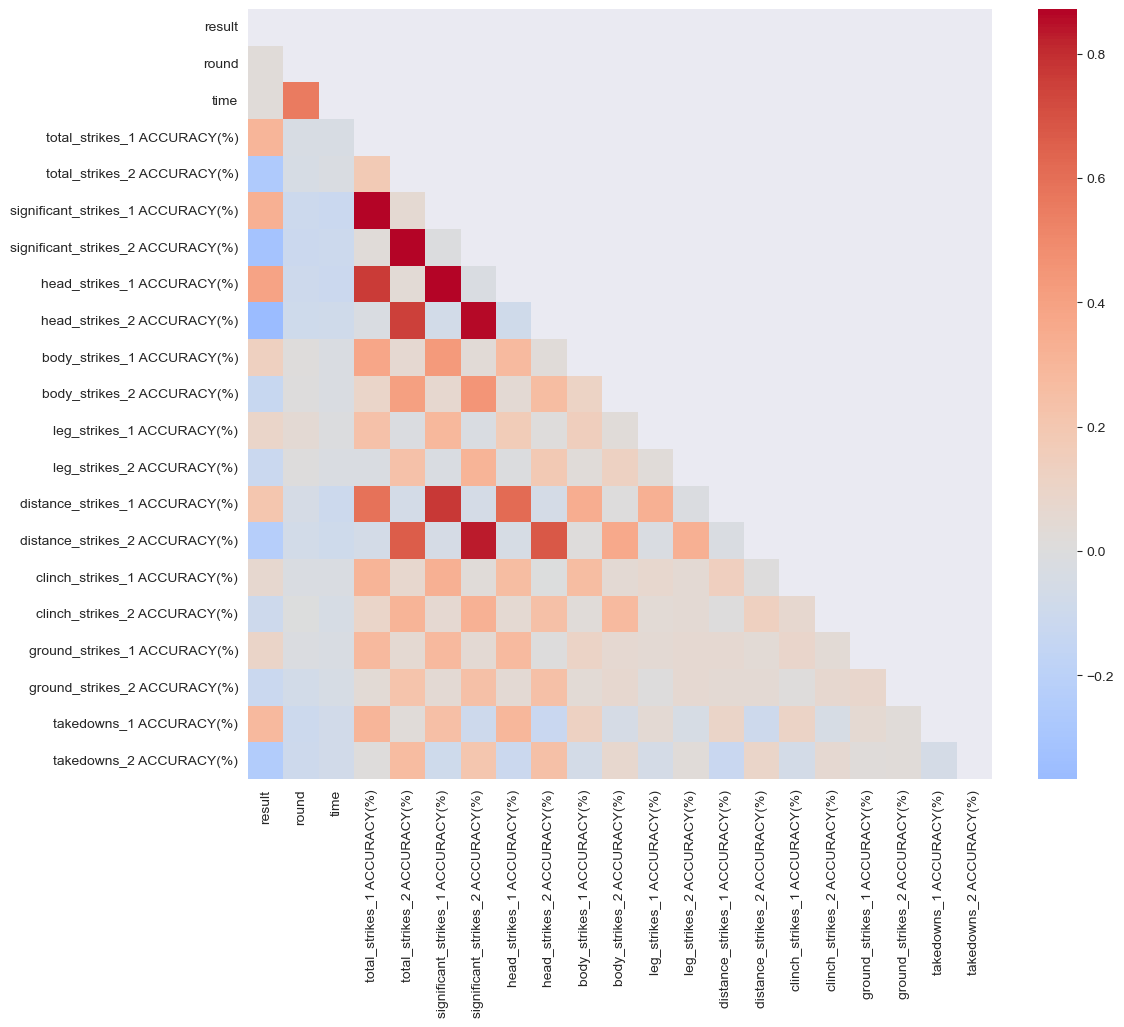

In [23]:
# Here's a heat map of the correlation that is shared between each column of df2. This will help to have an overview of how 
# variables interact with each other which could lead to new study paths.

sns.set_style('dark', {'axes.grid' : False})
plt.figure(figsize=(12, 10))
sns.heatmap(data=(df2.corr()), cmap='coolwarm', center=0, mask=np.triu(df2.corr()))

In [25]:
# CONCLUSION

# Correlation values of df1 show that knockdowns, ground strikes, and control time are the most influential components in
# a fight result.

    # Knockdowns and control time are logically understandable variables to assume a correlation with the result of a fight.

    # Knockdowns are events that happen when a fighter partially or fully loses consciousness due to a blow(s) to the head. 
    # When this happens, it causes a major shift in the fight outcome because the fighter is disoriented if not out. 

    # Control time is measured by the amount of time a fighter spends in a dominant position where most likely, his opponent
    # can't land any significant strike and, where the fighter in the dominant position can land important strikes with 
    # little to no risk.

    # On the other hand, ground strikes are not the most obvious variable to assume a correlation with fight outcomes. An 
    # explantation to ground strikes significance could be the fact that when a fighter lands or attempts ground strikes,
    # he's most likely on top of his opponent in an advantageous position where, similar to control time, he is more likely to
    # land strikes with little risk.
    
    
# Correlation values of df2, which included only the values of strike accuracy, show that head strikes accuracy and
# significant strikes accuracy are considerably more influential than the other accuracy variables. Indeed, they both share 
# more correlation with fight result (0.391861 and 0.334599 respectively) than the top variable in df which is 
# ground_strikes_1 (landed) (0.313407).

    # Significant strike accuracy is closely related to head strike accuracy (see correlation heat map of df2). 
    # This relation can be explained by the truth that head strikes are often significant strikes.
    # This affirmes the hypothesis about the link between significant strike accuracy and the conservation of energy. 


# Additionally, an analysis of control time can be effected where it compares fighter 1's control time versus
# fighter 2's control time by a relativity ratio. Also, analysts could be curious about analyzing the octagon (name of the ring)
# area control, which is not included in this dataset. It measures the space and position a fighter takes (EX: the most
# advantagious position in the octagon the center)


# Furthermore, this analysis can be pushed toward machine learning where an A.I. model could be produced to predict the winner
# of a fight before the event for betting purposes. Or, during a fight where it can predict fight outcome by analyzing strikes
# and takedowns count and give a live prediction as the fight goes on.


# In conclusion, fight outcomes have more variables than simple strikes count. Fight styles, genetics, anxiety, performance-
# enhancing drugs and even luck play a major role in a fight. I wish that you enjoyed the reading and hope that this study 
# piqued your interest in MMA.